In [158]:
import numpy as np
import matplotlib.pyplot as plt 
import healpy as hp

import yaml

from Qatmosphere_2d import Atmsophere

import scipy
import scipy.special as sci_spe
import time
from astropy.time import TimeDelta
 
import sys
import yaml

sys.path.append('/home/laclavere/qubic/qubic/Pipeline')

import qubic
from qubic.lib.Qscene import QubicScene

from pyoperators.iterative.core import AbnormalStopIteration
from pysimulators import (
    CartesianEquatorial2GalacticOperator,
    CartesianEquatorial2HorizontalOperator,
    CartesianHorizontal2EquatorialOperator,
    CartesianGalactic2EquatorialOperator,
    SamplingHorizontal,
    SphericalEquatorial2GalacticOperator,
    SphericalGalactic2EquatorialOperator,
    SphericalEquatorial2HorizontalOperator,
    SphericalHorizontal2EquatorialOperator)
from pysimulators.interfaces.healpy import Cartesian2HealpixOperator, Spherical2HealpixOperator
from pyoperators import *

%matplotlib inline

In [159]:
with open('/home/laclavere/Documents/Thesis/qubic/qubic/scripts/Atmosphere/params.yml', 'r') as file:
    params = yaml.safe_load(file)

In [160]:
atm = Atmsophere(params)

[28.88327169]
[[-1.21195409e-04 -1.23034877e-04 -1.20776069e-04 ... -1.02002962e-04
  -1.27714031e-04 -1.03171502e-04]
 [-1.26177833e-04 -1.11022483e-04 -1.03701078e-04 ... -1.09381236e-04
  -1.24001356e-04 -1.11582694e-04]
 [-1.32174042e-04 -1.14795196e-04 -1.28353818e-04 ... -1.27850954e-04
  -1.21695482e-04 -1.28691710e-04]
 ...
 [-8.74958476e-05 -1.33123946e-04 -1.90522831e-04 ... -9.53100816e-05
  -8.19419461e-05 -9.21310032e-05]
 [-1.03266050e-04 -1.34437036e-04 -1.53580874e-04 ... -1.23501613e-04
  -1.08888796e-04 -1.16381264e-04]
 [-1.10441784e-04 -1.20375380e-04 -1.14893292e-04 ... -1.16402761e-04
  -1.16261945e-04 -1.07154746e-04]]


In [161]:
atm.mean_water_vapor_density

array([28.88327169])

In [162]:
rho = atm.mean_water_vapor_density
print(rho)

[28.88327169]


In [163]:
delta_rho = atm.generate_spatial_fluctuations_2d()
print((delta_rho))

[[1.70187714e-04 1.57403012e-04 1.36211299e-04 ... 9.83731071e-05
  1.26618846e-04 1.54531238e-04]
 [1.59105338e-04 1.32319043e-04 1.16209767e-04 ... 8.98647926e-05
  1.10057293e-04 1.36070807e-04]
 [8.87037546e-05 8.81024356e-05 1.00547288e-04 ... 4.59277253e-05
  4.66170898e-05 7.15196216e-05]
 ...
 [1.35038262e-04 1.33508155e-04 1.07685987e-04 ... 1.00708042e-04
  1.24703726e-04 1.30691000e-04]
 [1.14644144e-04 1.39539238e-04 1.04873571e-04 ... 1.05963271e-04
  1.12534420e-04 1.34179194e-04]
 [1.45631468e-04 1.65709463e-04 1.29717684e-04 ... 9.24595996e-05
  1.27835014e-04 1.47284243e-04]]


In [164]:
atm.get_water_vapor_density_2d_map()

[28.88327169]
[[ 2.57812485e-05  3.78042648e-05  4.83494741e-05 ...  5.22848172e-05
   3.06726807e-05  6.40497805e-05]
 [ 7.01289165e-06  3.69135550e-05  3.88210466e-05 ...  4.61794497e-05
   3.83456419e-05  1.39980168e-05]
 [-7.64097425e-06  2.10073584e-05  3.27935832e-05 ...  4.46638162e-05
   3.41690408e-05 -5.67014634e-08]
 ...
 [ 6.87240323e-05  8.49953545e-05  9.75122966e-05 ...  7.50838105e-05
   7.47891987e-05  7.44136976e-05]
 [ 5.44361725e-05  5.16584945e-05  8.85680384e-05 ...  6.22229316e-05
   5.84083973e-05  6.76315660e-05]
 [ 4.53892924e-05  5.38273866e-05  7.77503418e-05 ...  3.30517687e-05
   1.61077287e-05  5.61654628e-05]]


array([[33.23654679, 34.31443446, 35.25983373, ..., 35.61264519,
        33.67507355, 36.66739787],
       [31.55392574, 34.23458052, 34.40559099, ..., 35.06528667,
        34.36297   , 32.1801563 ],
       [30.24017711, 32.80855792, 33.86521674, ..., 34.92940707,
        33.98852929, 30.92012246],
       ...,
       [37.08645397, 38.54521083, 39.66737994, ..., 37.65662092,
        37.63020838, 37.59654395],
       [35.80551852, 35.55649409, 38.86550915, ..., 36.50361718,
        36.16163649, 36.98851217],
       [34.99444747, 35.75093964, 37.89568083, ..., 33.88836359,
        32.36929623, 35.96055289]])

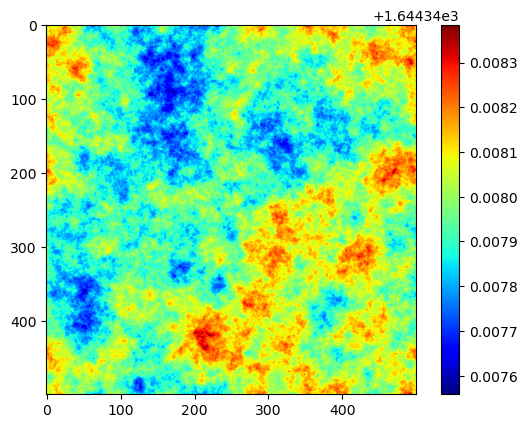

In [165]:
plt.imshow(atm.get_mean_water_vapor_density(atm.params['altitude_atm_2d'] + atm.generate_spatial_fluctuations_2d()), cmap='jet')
plt.colorbar()

[28.88327169]
[[-7.83709750e-05 -7.13232127e-05 -4.03854414e-05 ... -1.04569149e-04
  -7.88995514e-05 -5.80403830e-05]
 [-7.74968739e-05 -6.55610195e-05 -3.95568535e-05 ... -9.70347133e-05
  -6.66518095e-05 -7.81284618e-05]
 [-7.52558980e-05 -5.57537311e-05 -3.49897822e-05 ... -8.70394715e-05
  -8.55542108e-05 -6.48130400e-05]
 ...
 [ 1.24865563e-05  3.94450255e-05  2.83668879e-05 ... -6.15712445e-05
  -5.11614780e-05 -1.88167430e-05]
 [-2.62818885e-05  7.88162502e-06 -1.99243028e-05 ... -8.01498752e-05
  -6.50287092e-05 -6.11055944e-05]
 [-3.69101885e-05 -3.12195424e-05 -2.65035493e-05 ... -8.66519556e-05
  -7.24626293e-05 -5.70558124e-05]]


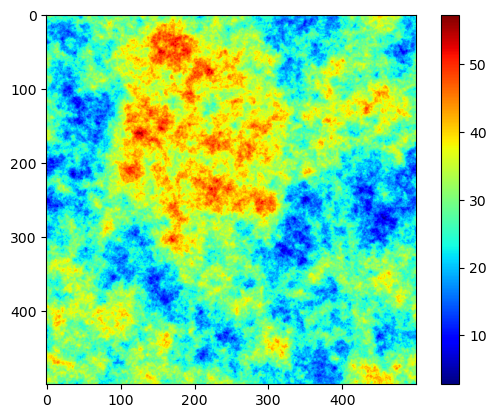

In [166]:
plt.imshow(atm.get_water_vapor_density_2d_map(), cmap='jet')
plt.colorbar()

In [167]:
map_temp = atm.get_maps()
frequencies = atm.integrated_absorption_spectrum()[1]

[28.88327169]
[[-3.10208431e-06 -1.42385224e-05 -4.85963602e-05 ...  1.76735776e-05
   1.71749463e-05  2.08107037e-05]
 [-3.98792612e-05 -3.95266094e-05 -5.36193365e-05 ...  1.87296138e-06
  -1.33142800e-05 -9.76784797e-06]
 [-3.25526616e-05 -5.70354984e-05 -5.75129027e-05 ... -2.39015503e-05
  -4.21093209e-05 -3.85329139e-05]
 ...
 [-3.74727855e-05 -2.44018343e-05 -4.18379920e-05 ... -4.79003940e-05
  -6.04447677e-05 -5.73530490e-05]
 [-3.58426567e-08 -1.64840512e-05 -5.06822609e-05 ... -4.19989219e-06
  -6.50087725e-06 -2.48588747e-05]
 [ 5.93476194e-06 -1.96363630e-05 -5.40565314e-05 ...  1.66945472e-05
  -9.47004383e-06 -1.35900184e-05]]


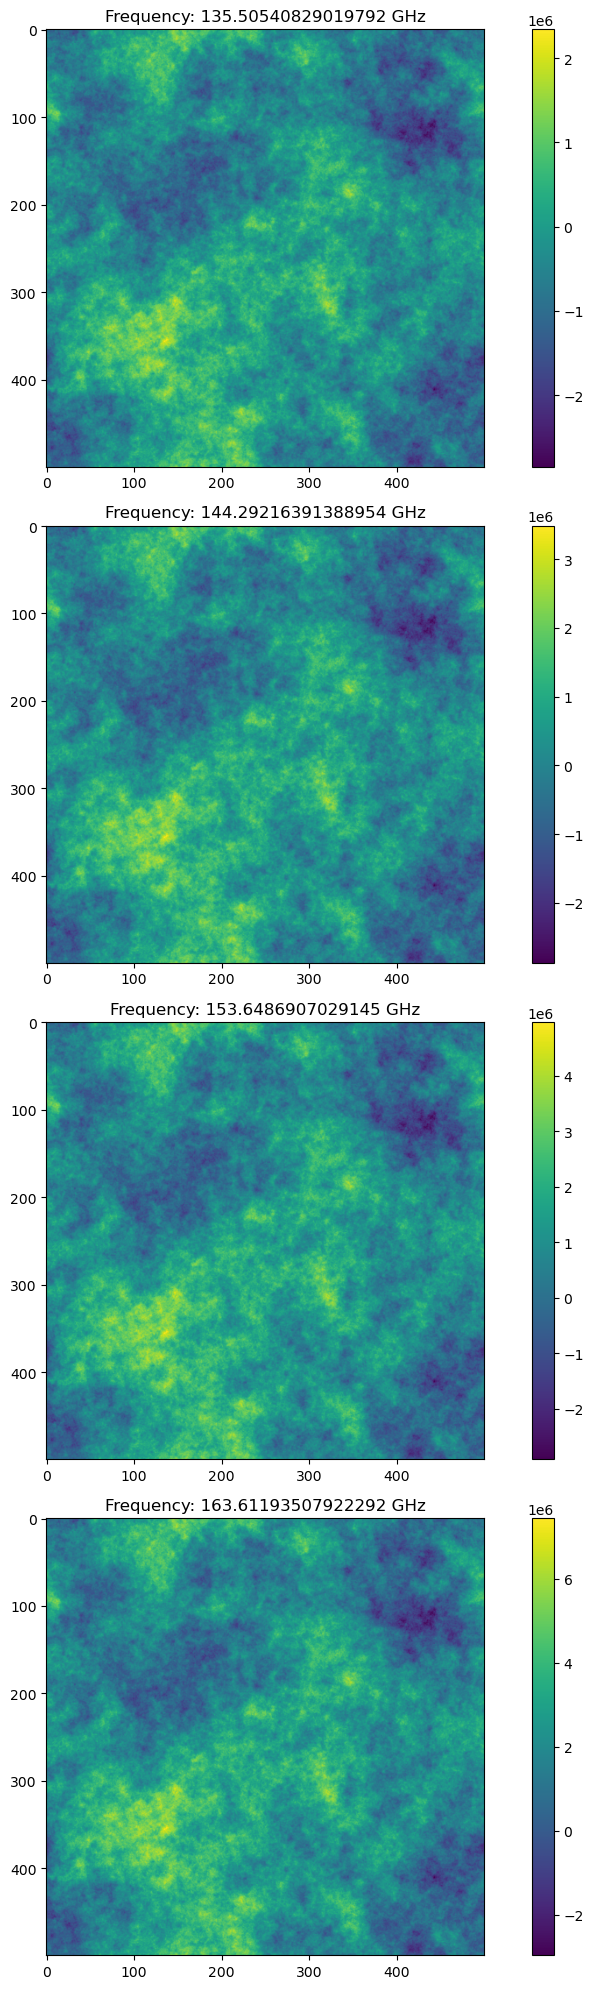

In [168]:
fig, axs = plt.subplots(len(frequencies), 1, figsize=(10, 5*len(frequencies)))
for i in range(len(frequencies)):
    im = axs[i].imshow(map_temp[i])
    plt.colorbar(im, ax=axs[i])
    axs[i].set_title(f'Frequency: {frequencies[i]} GHz')
plt.tight_layout()
plt.show()

In [169]:
qubic_patch = qubic.lib.Qsamplings.equ2gal(atm.qubic_dict['RA_center'], atm.qubic_dict['DEC_center'])
center = np.array([0, -57])

In [170]:
healpy_atm_maps = atm.get_healpy_atm_maps_2d()

[28.88327169]
[[-0.00014142 -0.00013997 -0.00013583 ... -0.00016822 -0.00017717
  -0.00016526]
 [-0.00014471 -0.00014807 -0.00016393 ... -0.00019114 -0.00015587
  -0.00014535]
 [-0.00012751 -0.00013391 -0.00014921 ... -0.00018039 -0.00015189
  -0.0001504 ]
 ...
 [-0.00016318 -0.00016653 -0.00017218 ... -0.00014699 -0.00014592
  -0.00015293]
 [-0.0001874  -0.00016766 -0.00015872 ... -0.00015439 -0.00015391
  -0.00017276]
 [-0.00017516 -0.00015493 -0.00012175 ... -0.00015574 -0.00017099
  -0.00018457]]
[28.88327169]
[[-1.28126600e-05 -3.14887623e-05 -2.85440877e-05 ... -3.28734766e-05
  -3.51886224e-05 -2.98127262e-05]
 [-9.80089493e-06 -7.41719581e-06 -2.92448715e-05 ... -2.32673276e-05
  -3.63736821e-05 -8.88666352e-06]
 [-1.99591512e-05 -1.62231386e-05 -2.07195044e-05 ... -2.57808867e-05
  -3.58835260e-05 -2.67805022e-05]
 ...
 [ 2.59257156e-05  8.93966724e-06  1.25422833e-05 ... -8.11682444e-06
   3.78766815e-05  4.67827766e-05]
 [-3.48927280e-05  1.41072497e-06 -1.17586170e-05 ...  

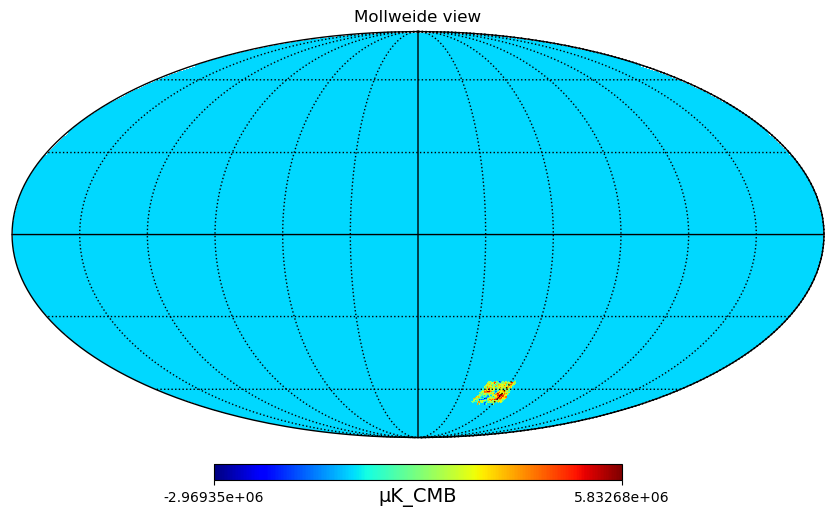

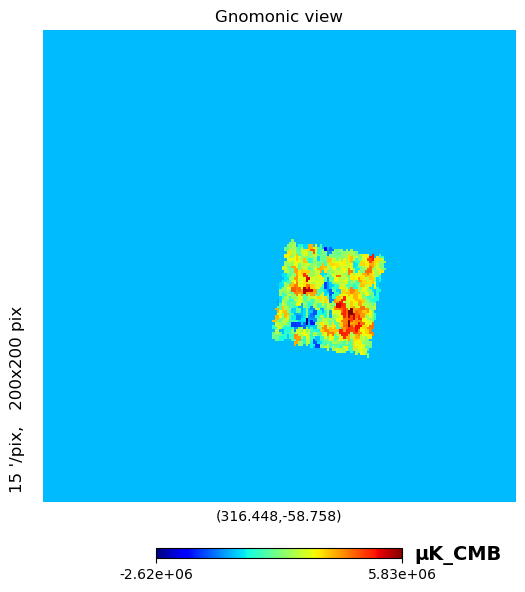

In [171]:
hp.mollview(healpy_atm_maps[-1] ,min=np.min(map_temp[-1]), cmap='jet', unit='µK_CMB')
hp.graticule()
hp.gnomview(healpy_atm_maps[-1] ,cmap='jet', unit='µK_CMB', rot=qubic_patch, reso=15)

In [172]:
from qubic.scripts.MapMaking.src.FMM.model.planck_timeline import InputMaps
from pyoperators import *
comm = MPI.COMM_WORLD
rank = comm.Get_rank()

In [173]:
cmb_maps = InputMaps({'cmb':42}, atm.frequencies, 2, params['nside']).m_nu

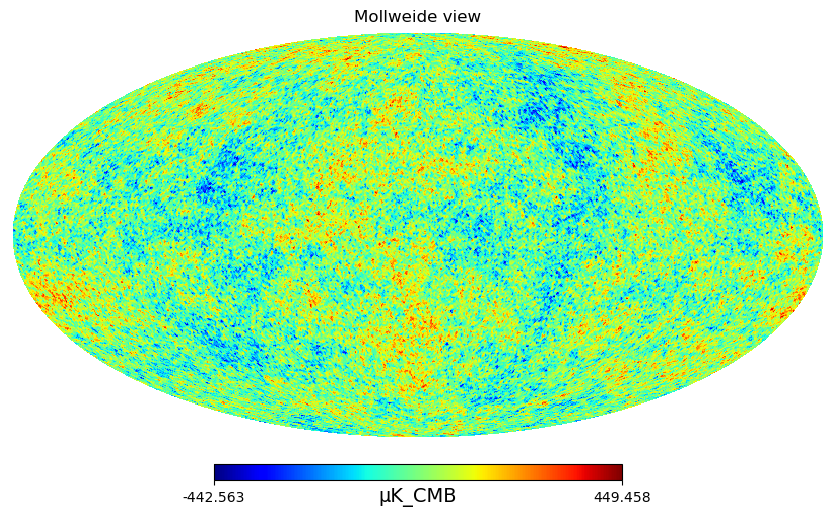

In [174]:
hp.mollview(cmb_maps[-1, :, 0],cmap='jet', unit='µK_CMB')

In [175]:
input_maps = cmb_maps.copy()
input_maps[:, :, 0] += healpy_atm_maps

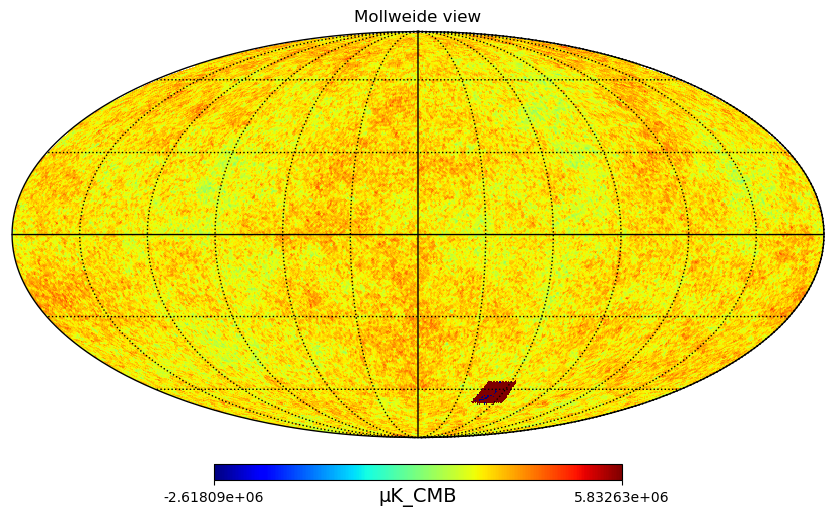

In [176]:
hp.mollview(input_maps[-1, :, 0] ,cmap='jet', unit='µK_CMB', norm='hist')
hp.graticule()


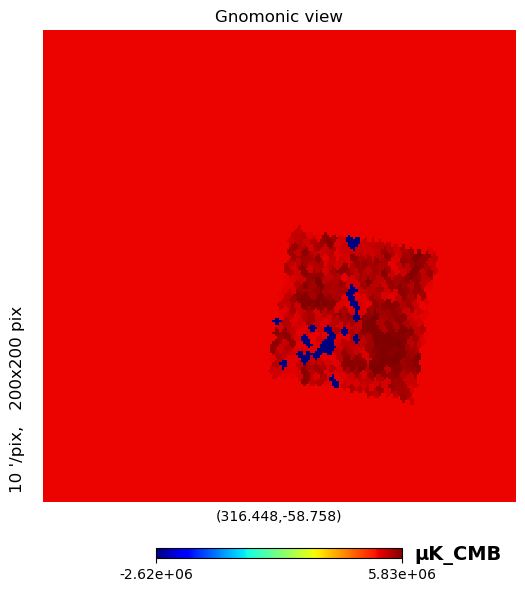

In [177]:
hp.gnomview(input_maps[-1, :, 0], cmap="jet", unit="µK_CMB", norm="hist", reso=10, rot=qubic_patch) 

In [198]:
qubic_sampling = qubic.lib.Qsamplings.QubicSampling(params['npointings'], date_obs=atm.qubic_dict['date_obs'], period=atm.qubic_dict['period'], latitude=atm.qubic_dict['latitude'], longitude=atm.qubic_dict['longitude'])
time = qubic_sampling.date_obs + TimeDelta(qubic_sampling.time, format='sec')

In [199]:
r = np.random.RandomState(2)

cosdtheta = np.cos(np.radians(15))
theta = np.degrees(np.arccos(cosdtheta + (1 - cosdtheta) * r.rand(params['npointings'])))
phi = r.rand(params['npointings']) * 360
pitch = r.rand(params['npointings']) * 360

Text(0, 0.5, 'phi')

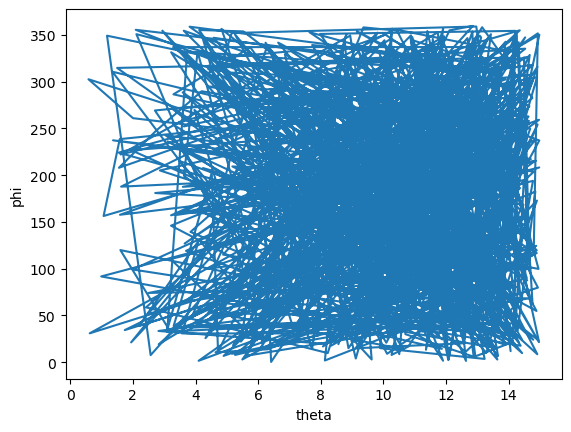

In [232]:
plt.plot(theta, phi)
plt.xlabel('theta')
plt.ylabel('phi')

In [304]:
qubic_patch

(array(316.44761929), array(-58.75808063))

In [329]:
c2s = Cartesian2SphericalOperator('azimuth,elevation')
e2h = CartesianEquatorial2HorizontalOperator(
    'NE', time, qubic_sampling.latitude, qubic_sampling.longitude)
rot = Rotation3dOperator("ZY'", 0, -57, degrees=True)
s2c = Spherical2CartesianOperator('zenith, azimuth', degrees=True)
rotation = c2s(e2h(rot(s2c)))
coords = rotation(np.asarray([theta.T, phi.T]).T)
azimuth_qubic = coords[..., 0]
elevation_qubic = coords[..., 1]

Text(0, 0.5, 'Elevation')

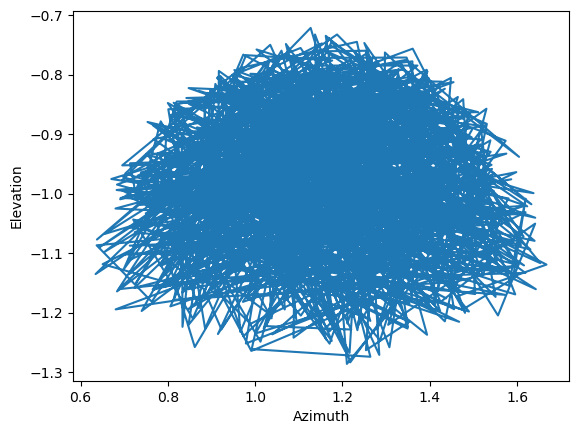

In [330]:
plt.plot(azimuth_qubic, elevation_qubic)
plt.xlabel('Azimuth')
plt.ylabel('Elevation')

In [337]:
hp_test = np.zeros(hp.nside2npix(params['nside']))
rotation_azel2hp = Spherical2HealpixOperator(params['nside'], 'azimuth,elevation')
hp_test_index = rotation_azel2hp(np.asarray([azimuth_qubic, elevation_qubic]).T).astype(int)
hp_test[hp_test_index] = 1

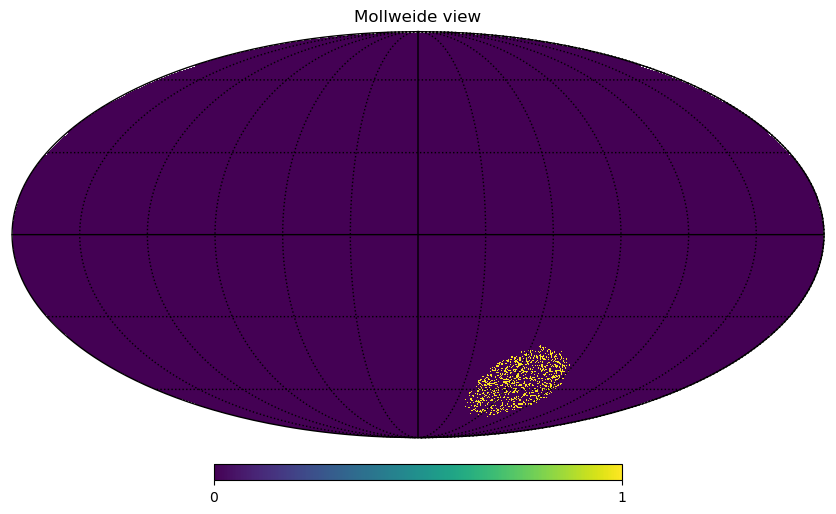

In [338]:
hp.mollview(hp_test)
hp.graticule()

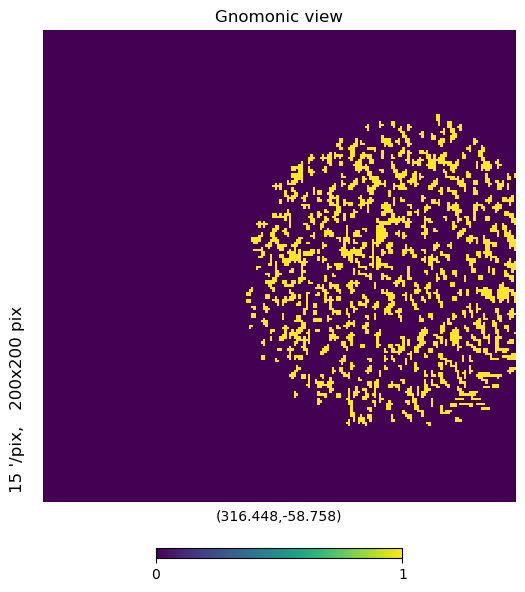

In [339]:
hp.gnomview(hp_test, rot=qubic_patch, reso=15)

# Map-making

In [186]:
Qacq = qubic.lib.InstrumentModel.Qacquisition.QubicDualBand(atm.qubic_dict, nsub=params['nsub_in'], nrec=params['nrec'])
H = Qacq.get_operator(fwhm=Qacq.allfwhm)
invN = Qacq.get_invntt_operator()

You asked 1000 pointings with repeat strategy so I will provide 333 pointings repeated 3 times.
Info apcnb2325: Allocating (991008,9) elements = 136.09423828125 MiB in FSRRotation3dMatrix.__init__.
Info apcnb2325: Allocating (991008,9) elements = 136.09423828125 MiB in FSRRotation3dMatrix.__init__.
Info apcnb2325: Allocating (991008,9) elements = 136.09423828125 MiB in FSRRotation3dMatrix.__init__.
Info apcnb2325: Allocating (991008,9) elements = 136.09423828125 MiB in FSRRotation3dMatrix.__init__.


In [187]:
#coverage = joint.qubic.subacqs[0].get_coverage()
coverage = Qacq.coverage
npix_qubic=0
for i in coverage:
    if i!=0:
        npix_qubic+=1
covnorm = coverage / coverage.max()
seenpix = covnorm > 0.1
fsky = seenpix.astype(float).sum() / seenpix.size
coverage_cut = coverage.copy()
coverage_cut[~seenpix] = 1

mask = np.ones(12*params['nside']**2)
mask[seenpix] = 0

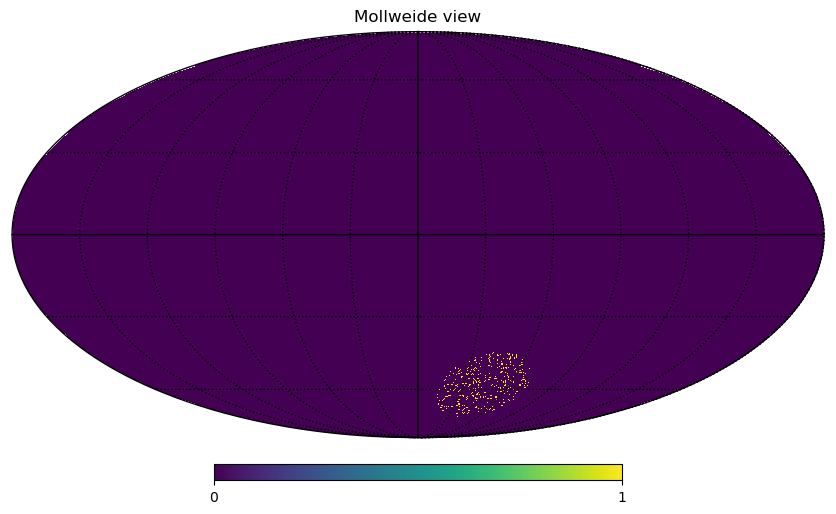

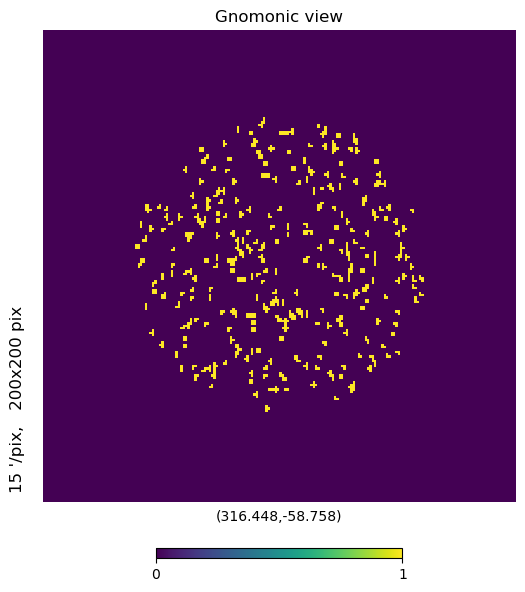

In [188]:
test_index = Qacq.sampling.healpix(atm.params['nside'])
test_hp = np.zeros(12*atm.params['nside']**2)
for i in test_index:
    test_hp[int(i)] = 1
hp.mollview(test_hp)
hp.graticule()
hp.gnomview(test_hp, rot=qubic_patch, reso=15)

In [189]:
A = H.T * invN * H
b = H.T * invN * H(input_maps)
x0 = input_maps #+ 1e3 * np.random.randn(input_maps.shape[0], input_maps.shape[1], input_maps.shape[2])  

In [190]:
approx_hth = np.zeros((input_maps.shape))
conditioner = np.zeros((input_maps.shape))
vec = np.ones(Qacq.H[0].shapein)

for i in range(input_maps.shape[0]):
    for j in range(input_maps.shape[0]):
        approx_hth[i] = (
            Qacq.H[i].T
            * Qacq.invn220
            * Qacq.H[j](vec)
        )
fsub_out = int(params["nsub_in"] / params["nrec"])
for irec in range(params["nrec"]):
    imin = irec * fsub_out
    imax = (irec + 1) * fsub_out
    for istk in range(3):
        conditioner[irec, seenpix, istk] = 1 / (
            np.sum(approx_hth[imin:imax, seenpix, 0], axis=0)
        )

conditioner[conditioner == np.inf] = 1
M = DiagonalOperator(conditioner)

In [191]:
import time
from qubic.lib.Qcg import PCGAlgorithm
time0 = time.time()
algo = PCGAlgorithm(
    A,
    b,
    comm,
    x0=x0,
    tol=1e-10,
    maxiter=50,
    disp=True,
    M=M,
    center=center,
    reso=15,
    seenpix=seenpix,
    input=input_maps,
)
try:
    output = algo.run()
    success = True
    message = 'Success'
except AbnormalStopIteration as e:
    output = algo.finalize()
    success = False
    message = str(e)

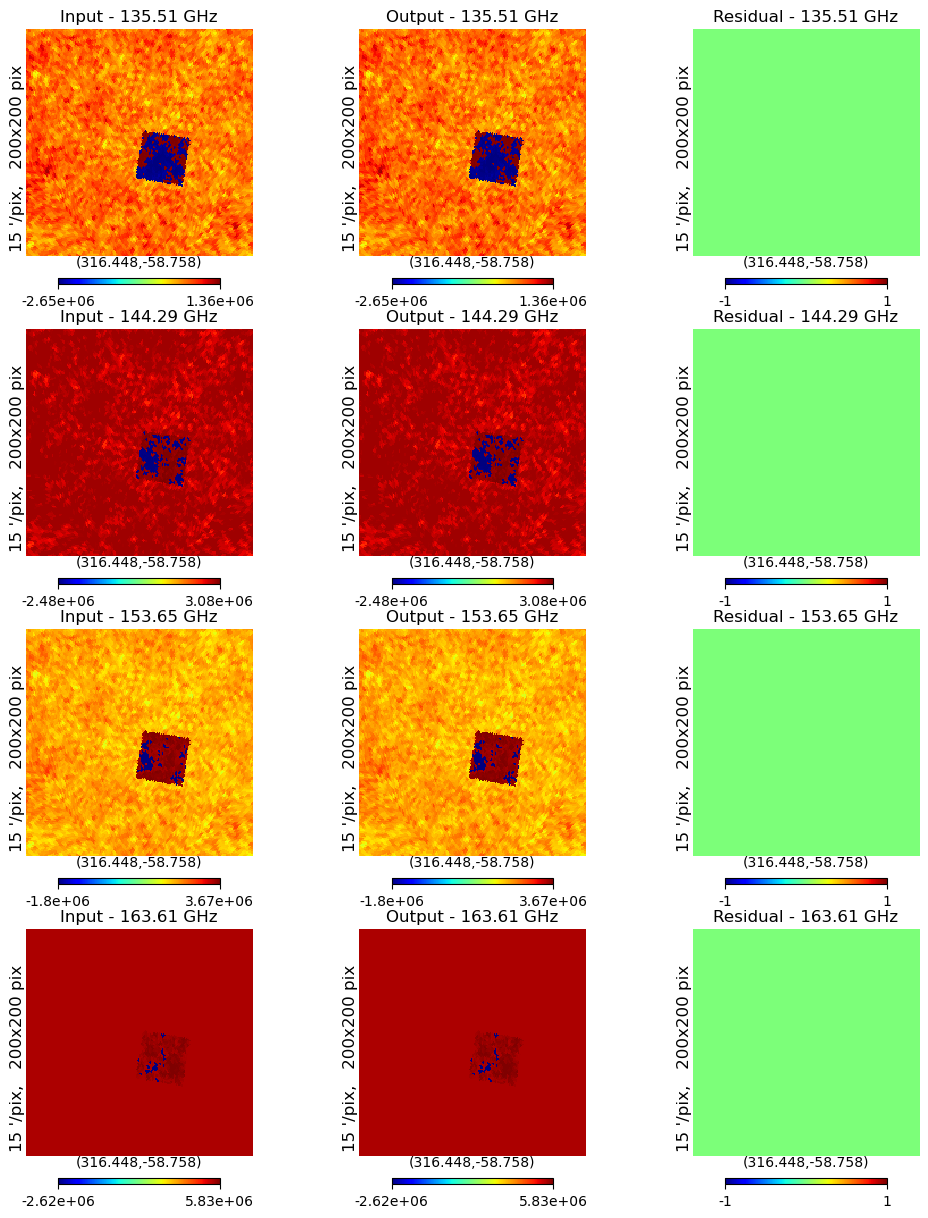

In [192]:
plt.figure(figsize=(10, 12))
k=1
for inu in range(output['x'].shape[0]):
    hp.gnomview(input_maps[inu, :, 0], norm='hist', cmap='jet', rot=qubic_patch,title='Input - {:.2f} GHz'.format(atm.frequencies[inu]), reso=15, sub=(output['x'].shape[0], 3, k))
    hp.gnomview(output['x'][inu, :, 0], norm='hist', cmap='jet', rot=qubic_patch,title='Output - {:.2f} GHz'.format(atm.frequencies[inu]), reso=15, sub=(output['x'].shape[0], 3, k+1))
    hp.gnomview(output['x'][inu, :, 0] - input_maps[inu, :, 0], norm='hist', cmap='jet', rot=qubic_patch,title='Residual - {:.2f} GHz'.format(atm.frequencies[inu]), reso=15, sub=(output['x'].shape[0], 3, k+2))
    k+=3

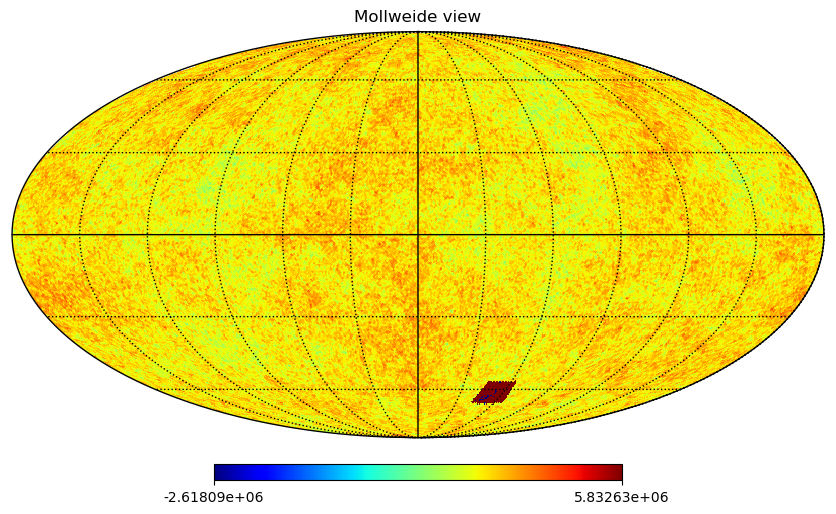

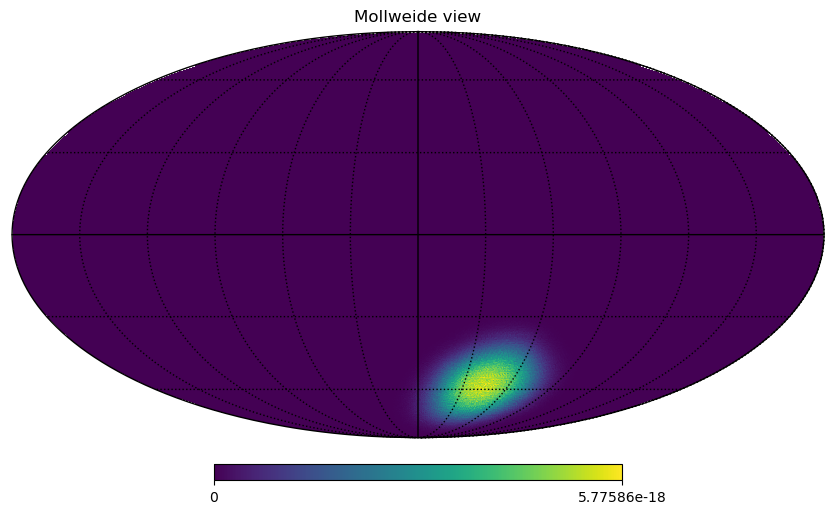

In [193]:
hp.mollview(output['x'][-1, :, 0], cmap='jet', norm='hist')
hp.graticule()
hp.mollview(coverage)
hp.graticule()

In [194]:
stop

NameError: name 'stop' is not defined

In [13]:
from lib.InstrumentModel.Qacquisition import QubicMultiAcquisitions

ModuleNotFoundError: No module named 'lib'

In [10]:
def get_dict(params, comm, key='in'):
    """QUBIC dictionary.

    Method to modify the qubic dictionary.

    Parameters
    ----------
    key : str, optional
        Can be "in" or "out".
        It is used to build respectively the instances to generate the TODs or to reconstruct the sky maps,
        by default "in".

    Returns
    -------
    dict_qubic: dict
        Modified QUBIC dictionary.

    """

    args = {
        "npointings": params["QUBIC"]["npointings"],
        "nf_recon": params["QUBIC"]["nrec"],
        "nf_sub": params["QUBIC"][f"nsub_{key}"],
        "nside": params["SKY"]["nside"],
        "MultiBand": True,
        "period": 1,
        "RA_center": params["SKY"]["RA_center"],
        "DEC_center": params["SKY"]["DEC_center"],
        "filter_nu": 150 * 1e9,
        "noiseless": False,
        "comm": comm,
        "dtheta": params["QUBIC"]["dtheta"],
        "nprocs_sampling": 1,
        "nprocs_instrument": comm.Get_size(),
        "photon_noise": True,
        "nhwp_angles": 3,
        #'effective_duration':3,
        "effective_duration150": 3,
        "effective_duration220": 3,
        "filter_relative_bandwidth": 0.25,
        "type_instrument": "two",
        "TemperatureAtmosphere150": None,
        "TemperatureAtmosphere220": None,
        "EmissivityAtmosphere150": None,
        "EmissivityAtmosphere220": None,
        "detector_nep": float(params["QUBIC"]["NOISE"]["detector_nep"]),
        "synthbeam_kmax": params["QUBIC"]["SYNTHBEAM"]["synthbeam_kmax"],
    }

    ### Get the default dictionary
    dictfilename = "dicts/pipeline_demo.dict"
    dict_qubic = qubic.lib.Qdictionary.qubicDict()
    dict_qubic.read_from_file(dictfilename)

    for i in args.keys():

        dict_qubic[str(i)] = args[i]

    return dict_qubic